# Importing the required libraries

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve
from keras.preprocessing.image import ImageDataGenerator,load_img
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from skimage import io
import numpy as np
import pandas as pd
import keras
import os
import cv2


In [3]:
pip remove geopandas

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "remove"



In [4]:
pip install geopandas

  Using cached geopandas-0.10.2-py2.py3-none-any.whl (1.0 MB)
  Using cached pyproj-3.3.0-cp38-cp38-win_amd64.whl (6.3 MB)
  Using cached Shapely-1.8.1.post1-cp38-cp38-win_amd64.whl (1.3 MB)
  Using cached Fiona-1.8.21.tar.gz (1.0 MB)
Note: you may need to restart the kernel to use updated packages.


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\asus\AppData\Local\Programs\Python\Python38\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\asus\\AppData\\Local\\Temp\\pip-install-5mu4q9dn\\fiona\\setup.py'"'"'; __file__='"'"'C:\\Users\\asus\\AppData\\Local\\Temp\\pip-install-5mu4q9dn\\fiona\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\asus\AppData\Local\Temp\pip-pip-egg-info-4_25vfvl'
         cwd: C:\Users\asus\AppData\Local\Temp\pip-install-5mu4q9dn\fiona\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the l

# Importing the Original Data Set

In [3]:
dir = r"E:\Python\project\Manual_Spinach"

catg1 = ['Downy Mildew','Healthy','Leaf_spot','white rust']

img_cube = []
image_size = 224

for i in catg1:
    path = os.path.join(dir,i)
    label = catg1.index(i)
    for j in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path,j))
        img_arr = cv2.resize(img_arr,(224,224))
        img_cube.append([img_arr,label])
        
print("length of the dataset : ",len(img_cube))
print("Whole imge data in the array format :",img_cube[10])

length of the dataset :  527
Whole imge data in the array format : [array([[[ 83, 125,  78],
        [ 91, 136,  89],
        [ 90, 143,  96],
        ...,
        [  5,  48,   8],
        [  4,  47,   8],
        [  3,  44,  12]],

       [[ 87, 128,  82],
        [ 92, 138,  92],
        [ 88, 143,  97],
        ...,
        [  5,  53,  10],
        [  4,  48,   9],
        [  4,  43,  10]],

       [[ 91, 132,  86],
        [ 93, 141,  95],
        [ 83, 142,  97],
        ...,
        [  6,  61,  15],
        [  4,  50,  11],
        [  5,  43,   8]],

       ...,

       [[ 24,  88,  43],
        [ 26,  83,  39],
        [ 24,  72,  33],
        ...,
        [  0,   1,   1],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 23,  84,  37],
        [ 26,  78,  34],
        [ 23,  68,  30],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 23,  81,  33],
        [ 25,  74,  30],
        [ 22,  65,  28],
        ...,
      

0

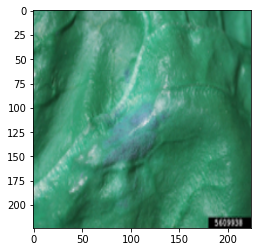

In [4]:
plt.imshow(img_cube[20][0])
img_cube[3][1]

In [5]:
img_cube[3][0].shape

(224, 224, 3)

In [6]:
feature=[]
target=[]
for i in img_cube:
    feature.append(i[0])
for i in img_cube:
    target.append(i[1])
feature=np.array(feature)
target=np.array(target)
feature = feature/255.0

# Splitting the Data set 

In [7]:
x_train,x_test,y_train,y_test= train_test_split(feature, target, random_state=0, test_size=0.25)

# Before Applying Augmentation to the dataset

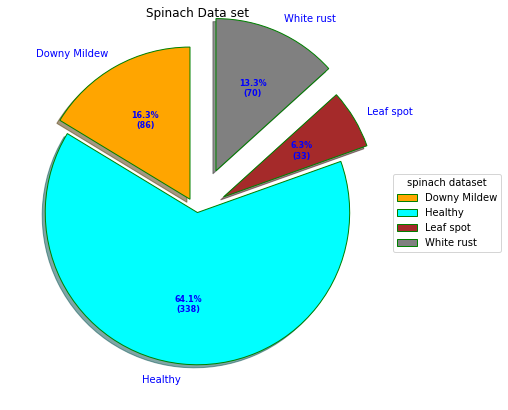

In [54]:

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
images = ['Downy Mildew', 'Healthy', 'Leaf spot',
        'White rust']
 
data = [86, 338, 33, 70]
 
# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3)
 
# Creating color parameters
colors = ( "orange", "cyan", "brown",
          "grey")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = images,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="Blue"))
 
# Adding legend
ax.legend(wedges, images,
          title ="spinach dataset",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Spinach Data set")
 
# show plot
plt.show()

# Applying Augmentation to the Original Dataset

In [1]:
import sys
from PIL import Image
sys.modules['Image'] = Image 

# Downy Mildew

In [ ]:
data_gen = ImageDataGenerator(
    rotation_range = 45, #random rotation bewteen 0 to 45
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',#constant,reflect ,wrap is another parameter
    cval = 125 #gray background
)

i = 0
for batch in data_gen.flow_from_directory(directory = "E:\Python\project\Manual_Spinach",
                                    classes=['Downy Mildew'],
                                    batch_size = 16,
                                    target_size = (256,256),
                                    color_mode = "rgb",
                                    save_to_dir = 'E:\\Python\\project\\Aug_spinach\\aug_downy_mildew',
                                    save_prefix = 'aug',
                                    save_format = 'jpg'):
    i +=1
    if i>30:
        break

# Leaf Spot

In [ ]:
data_gen = ImageDataGenerator(
    rotation_range = 45, #random rotation bewteen 0 to 45
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',#constant,reflect ,wrap is another parameter
    cval = 125 #gray background
)

i = 0
for batch in data_gen.flow_from_directory(directory = 'E:\\Python\\project\\Manual_Spinach',
                                        classes=['Leaf_spot'],
                                        batch_size = 16,
                                        target_size = (256,256),
                                        color_mode = "rgb",
                                        save_to_dir = 'E:\\Python\\project\\Aug_spinach\\aug_Leaf_spot',
                                        save_prefix = 'aug',
                                        save_format = 'jpg'):
    i +=1
    if i>30:
        break

Found 33 images belonging to 1 classes.


# White Rust

In [ ]:

data_gen = ImageDataGenerator(
    rotation_range = 45, #random rotation bewteen 0 to 45
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',#constant,reflect ,wrap is another parameter
    cval = 125 #gray background
)

i = 0
for batch in data_gen.flow_from_directory(directory = 'E:\\Python\\project\\Manual_Spinach',
                                        classes=['white rust'],
                                        batch_size = 16,
                                        target_size = (256,256),
                                        color_mode = "rgb",
                                        save_to_dir = 'E:\\Python\\project\\Aug_spinach\\aug_white_rust',
                                        save_prefix = 'aug',
                                        save_format = 'jpg'):
    i +=1
    if i>30:
        break

Found 70 images belonging to 1 classes.


# Healthy Leafs

In [ ]:

data_gen = ImageDataGenerator(
    rotation_range = 45, #random rotation bewteen 0 to 45
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',#constant,reflect ,wrap is another parameter
    cval = 125 #gray background
)

i = 0
for batch in data_gen.flow_from_directory(directory = 'E:\\Python\\project\\Manual_Spinach',
                                        classes=['Healthy'],
                                        batch_size = 16,
                                        target_size = (256,256),
                                        color_mode = "rgb",
                                        save_to_dir = 'E:\\Python\\project\\Aug_spinach\\aug_healthy_leafs',
                                          save_prefix = 'aug',
                                        save_format = 'jpg'):
    i +=1
    if i>50:
        break

Found 338 images belonging to 1 classes.


# Reading the Augmented Dataset

In [8]:
dir2 = r'E:\Python\project\Aug_spinach'

catg = ['aug_downy_mildew','aug_healthy_leafs','aug_Leaf_spot','aug_white_rust']

img_cube2= []
image_size = 224

for i in catg:
    path = os.path.join(dir2,i)
    label = catg.index(i)
    for j in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path,j))
        img_arr = cv2.resize(img_arr,(224,224))
        img_cube2.append([img_arr,label])
        
print("length of the dataset : ",len(img_cube2))
print("Whole imge data in the array format :",img_cube2[10])

length of the dataset :  2016
Whole imge data in the array format : [array([[[105, 188, 149],
        [109, 192, 150],
        [112, 194, 152],
        ...,
        [ 34, 104,  51],
        [ 41, 111,  58],
        [ 45, 115,  62]],

       [[ 97, 180, 140],
        [102, 186, 143],
        [108, 190, 147],
        ...,
        [ 36, 106,  54],
        [ 42, 112,  59],
        [ 45, 115,  62]],

       [[ 76, 160, 117],
        [ 85, 170, 126],
        [ 99, 181, 137],
        ...,
        [ 40, 110,  57],
        [ 45, 115,  62],
        [ 45, 115,  62]],

       ...,

       [[ 92, 179, 121],
        [ 91, 179, 121],
        [ 89, 178, 119],
        ...,
        [ 15,  43,  20],
        [ 15,  43,  20],
        [ 15,  43,  20]],

       [[ 93, 179, 121],
        [ 91, 179, 120],
        [ 88, 176, 118],
        ...,
        [ 16,  44,  21],
        [ 16,  44,  21],
        [ 15,  43,  20]],

       [[ 95, 180, 122],
        [ 93, 178, 120],
        [ 88, 176, 117],
        ...,
     

In [9]:
import random 
random.shuffle(img_cube2)

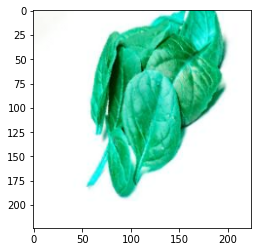

In [10]:
feature2 =[]
target2 = []
for i,j in img_cube2:
    feature2.append(i)
    target2.append(j)
x = np.array(feature2)
x = x/255.0
y = np.array(target2)
plt.imshow(x[500],cmap='gray')

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)
x_train.shape

(1512, 224, 224, 3)

In [11]:
y_test.shape

(504,)

# After Applying Augmentation to the Dataset

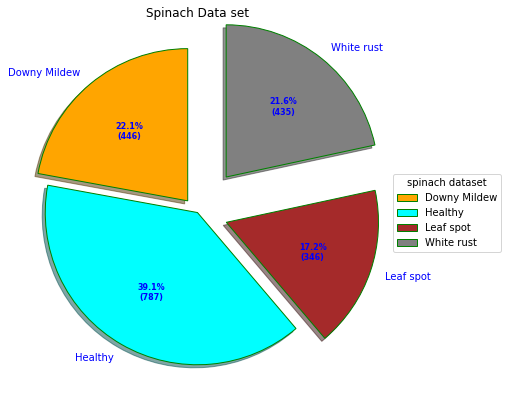

In [59]:

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
images = ['Downy Mildew', 'Healthy', 'Leaf spot',
        'White rust']
 
data = [446, 788, 346, 436]
 
# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3)
 
# Creating color parameters
colors = ( "orange", "cyan", "brown",
          "grey")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = images,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="Blue"))
 
# Adding legend
ax.legend(wedges, images,
          title ="spinach dataset",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Spinach Data set")
 
# show plot
plt.show()

# MOdel_1. CNN

In [11]:
cnn=Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(3,3))
cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(3,3))
cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(3,3))

cnn.add(Flatten(input_shape=x_train.shape[1:] ))

cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(128,activation='relu'))

cnn.add(Dense(9,activation='softmax'))

cnn.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history=cnn.fit(x_train,
                y_train,
                epochs=20,  #20
                batch_size=32,  #15
                validation_data=(x_test,y_test) )

Epoch 1/20
48/48 [==============================] - 44s 890ms/step - loss: 1.1383 - accuracy: 0.4788 - val_loss: 0.7977 - val_accuracy: 0.5853
Epoch 2/20
48/48 [==============================] - 32s 657ms/step - loss: 0.7728 - accuracy: 0.6065 - val_loss: 0.7667 - val_accuracy: 0.6131
Epoch 3/20
48/48 [==============================] - 25s 517ms/step - loss: 0.6994 - accuracy: 0.6422 - val_loss: 0.6295 - val_accuracy: 0.7024
Epoch 4/20
48/48 [==============================] - 31s 645ms/step - loss: 0.6172 - accuracy: 0.6991 - val_loss: 0.7057 - val_accuracy: 0.7222
Epoch 5/20
48/48 [==============================] - 31s 641ms/step - loss: 0.6181 - accuracy: 0.7163 - val_loss: 0.7254 - val_accuracy: 0.6984
Epoch 6/20
48/48 [==============================] - 29s 593ms/step - loss: 0.5962 - accuracy: 0.7255 - val_loss: 0.5943 - val_accuracy: 0.7421
Epoch 7/20
48/48 [==============================] - 31s 648ms/step - loss: 0.4833 - accuracy: 0.7798 - val_loss: 0.4708 - val_accuracy: 0.7996

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0

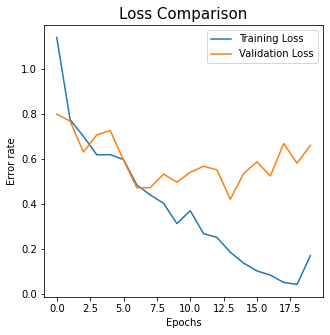

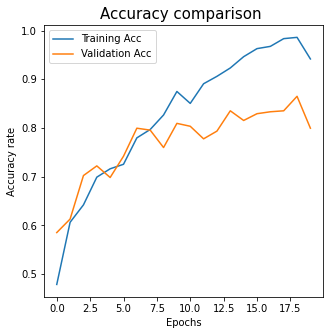

In [12]:
cnn.summary()

y_pred=cnn.predict(x_test)

y_pred1=np.argmax(y_pred,axis=1)

print("-"*80)
print("Accuracy Found: ",accuracy_score(y_test,y_pred1))

print("-"*80)
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred1)) 
print("-"*80)
print("Classification Report:\n",classification_report(y_test,y_pred1))
print("-"*80)

plt.figure(figsize=(5,5))
plt.title('Loss Comparison',fontsize=15)
plt.plot(history.history['loss'],)
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss','Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Error rate")
plt.show()


plt.figure(figsize=(5,5))
plt.title('Accuracy comparison ',fontsize=15)
plt.plot(history.history['accuracy'],)
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Acc','Validation Acc'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy rate")
plt.show()

# Model_2. VGG19

In [13]:
tl_model=VGG19(weights='imagenet',include_top=False, input_shape=x_train.shape[1:])


flat1=Flatten()(tl_model.layers[-1].output)
class1=Dense(512,activation='relu')(flat1)
output=Dense(11,activation='softmax')(class1)

tl_model=Model(inputs=tl_model.inputs,outputs=output)


for layer in tl_model.layers[:20]:
    layer.trainable = False
for layer in tl_model.layers[20:]:
    layer.trainable = True
    
tl_model.compile(optimizer='Adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

history2=tl_model.fit(x_train,
                     y_train,
                     verbose=1,
                     epochs=10,  #20
                     batch_size=32,  #15
                     validation_data=(x_test,y_test) )

Epoch 1/10
48/48 [==============================] - 246s 5s/step - loss: 1.2361 - accuracy: 0.6567 - val_loss: 0.5480 - val_accuracy: 0.7817
Epoch 2/10
48/48 [==============================] - 215s 5s/step - loss: 0.3450 - accuracy: 0.8618 - val_loss: 0.3270 - val_accuracy: 0.8790
Epoch 3/10
48/48 [==============================] - 215s 4s/step - loss: 0.1729 - accuracy: 0.9266 - val_loss: 0.5593 - val_accuracy: 0.8175
Epoch 4/10
48/48 [==============================] - 220s 5s/step - loss: 0.1205 - accuracy: 0.9570 - val_loss: 0.3905 - val_accuracy: 0.8730
Epoch 5/10
48/48 [==============================] - 214s 4s/step - loss: 0.0847 - accuracy: 0.9769 - val_loss: 0.4113 - val_accuracy: 0.8690
Epoch 6/10
48/48 [==============================] - 213s 4s/step - loss: 0.0668 - accuracy: 0.9775 - val_loss: 0.3720 - val_accuracy: 0.8829
Epoch 7/10
48/48 [==============================] - 213s 4s/step - loss: 0.0315 - accuracy: 0.9881 - val_loss: 0.3194 - val_accuracy: 0.8968
Epoch 8/10
48

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

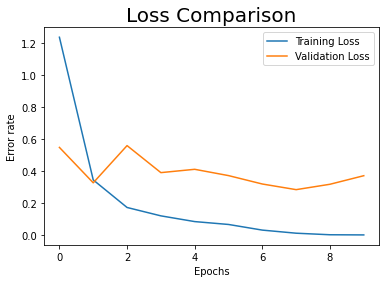

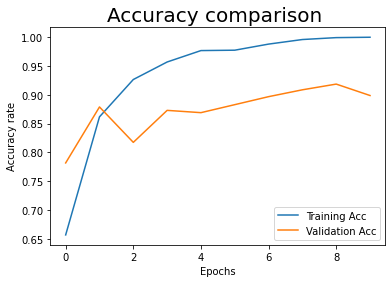

In [14]:
tl_model.summary()

y_pred2=tl_model.predict(x_test)

y_pred2=np.argmax(y_pred2,axis=1)

print("-"*80)
print("Accuracy Found: ",accuracy_score(y_test,y_pred2))

print("-"*80)
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred2)) 
print("-"*80)
print("Classification Report:\n",classification_report(y_test,y_pred2))
print("-"*80)

#plt.figure(figsize=(15,9))
plt.title('Loss Comparison',fontsize=20)
plt.plot(history2.history['loss'],)
plt.plot(history2.history['val_loss'])
plt.legend(['Training Loss','Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Error rate")
plt.show()


#plt.figure(figsize=(15,9))
plt.title('Accuracy comparison ',fontsize=20)
plt.plot(history2.history['accuracy'],)
plt.plot(history2.history['val_accuracy'])
plt.legend(['Training Acc','Validation Acc'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy rate")
plt.show()

# Model_3. ResNet50V2

In [15]:
Resnet_model=tf.keras.applications.ResNet50V2(weights='imagenet',include_top=False, input_shape=x_train.shape[1:])


flat1=Flatten()(Resnet_model.layers[-1].output)
class1=Dense(512,activation='relu')(flat1)
output=Dense(11,activation='softmax')(class1)

Resnet_model=Model(inputs=Resnet_model.inputs,outputs=output)


for layer in Resnet_model.layers[:20]:
    layer.trainable = False
for layer in Resnet_model.layers[20:]:
    layer.trainable = True
    
Resnet_model.compile(optimizer='Adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

history2=Resnet_model.fit(x_train,
                     y_train,
                     verbose=1,
                     epochs=10,  #20
                     batch_size=32,  #15
                     validation_data=(x_test,y_test) )

Epoch 1/10
48/48 [==============================] - 462s 9s/step - loss: 2.1913 - accuracy: 0.6138 - val_loss: 5236102.0000 - val_accuracy: 0.1528
Epoch 2/10
48/48 [==============================] - 423s 9s/step - loss: 2.2330 - accuracy: 0.6389 - val_loss: 1295652480.0000 - val_accuracy: 0.3710
Epoch 3/10
48/48 [==============================] - 420s 9s/step - loss: 6.1837 - accuracy: 0.5959 - val_loss: 144769648.0000 - val_accuracy: 0.2063
Epoch 4/10
48/48 [==============================] - 419s 9s/step - loss: 2.6486 - accuracy: 0.6078 - val_loss: 2120.2988 - val_accuracy: 0.2202
Epoch 5/10
48/48 [==============================] - 417s 9s/step - loss: 1.2421 - accuracy: 0.6085 - val_loss: 17.0214 - val_accuracy: 0.5774
Epoch 6/10
48/48 [==============================] - 377s 8s/step - loss: 1.2618 - accuracy: 0.6257 - val_loss: 13.6343 - val_accuracy: 0.6032
Epoch 7/10
48/48 [==============================] - 374s 8s/step - loss: 1.1292 - accuracy: 0.6356 - val_loss: 36.6877 - val_a

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

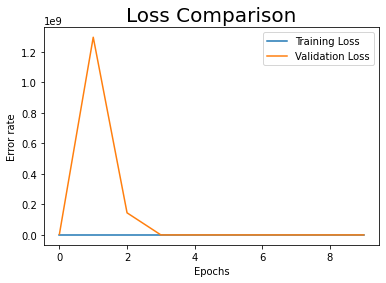

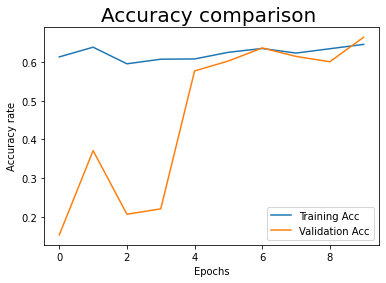

In [16]:
Resnet_model.summary()

y_pred3=Resnet_model.predict(x_test)

y_pred3=np.argmax(y_pred3,axis=1)

print("-"*80)
print("Accuracy Found: ",accuracy_score(y_test,y_pred3))

print("-"*80)
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred3)) 
print("-"*80)
print("Classification Report:\n",classification_report(y_test,y_pred3))
print("-"*80)

#plt.figure(figsize=(15,9))
plt.title('Loss Comparison',fontsize=20)
plt.plot(history2.history['loss'],)
plt.plot(history2.history['val_loss'])
plt.legend(['Training Loss','Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Error rate")
plt.show()


#plt.figure(figsize=(15,9))
plt.title('Accuracy comparison ',fontsize=20)
plt.plot(history2.history['accuracy'],)
plt.plot(history2.history['val_accuracy'])
plt.legend(['Training Acc','Validation Acc'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy rate")
plt.show()

In [53]:
import cv2
image = cv2.imread(str('E:\\Python\\project\\test_spinach\\Ls (1).jpg'))
image_resized = cv2.resize(image,(224,224))
image = np.expand_dims(image_resized,axis = 0)  

In [54]:
pred = cnn.predict(image)

In [56]:
output_class=catg1[np.argmax(pred)]
print("The predicted class is",output_class)

The predicted class is Leaf_spot


# Model_4. InceptionV3

In [14]:
Inception=tf.keras.applications.InceptionV3(weights='imagenet',include_top=False, input_shape=x_train.shape[1:])


flat1=Flatten()(Inception.layers[-1].output)
class1=Dense(512,activation='relu')(flat1)
output=Dense(11,activation='softmax')(class1)

Inception=Model(inputs=Inception.inputs,outputs=output)


for layer in Inception.layers[:20]:
    layer.trainable = False
for layer in Inception.layers[20:]:
    layer.trainable = True
    
Inception.compile(optimizer='Adagrad',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

history2=Inception.fit(x_train,
                     y_train,
                     verbose=1,
                     epochs=10,  #20
                     batch_size=32,  #15
                     validation_data=(x_test,y_test) )

Epoch 1/10
48/48 [==============================] - 250s 5s/step - loss: 0.9433 - accuracy: 0.6138 - val_loss: 1.3225 - val_accuracy: 0.6012
Epoch 2/10
48/48 [==============================] - 241s 5s/step - loss: 0.2715 - accuracy: 0.9101 - val_loss: 1.2244 - val_accuracy: 0.6369
Epoch 3/10
48/48 [==============================] - 242s 5s/step - loss: 0.1018 - accuracy: 0.9835 - val_loss: 1.0502 - val_accuracy: 0.6687
Epoch 4/10
48/48 [==============================] - 237s 5s/step - loss: 0.0454 - accuracy: 0.9954 - val_loss: 0.3580 - val_accuracy: 0.8690
Epoch 5/10
48/48 [==============================] - 238s 5s/step - loss: 0.0272 - accuracy: 0.9980 - val_loss: 0.4431 - val_accuracy: 0.8353
Epoch 6/10
48/48 [==============================] - 237s 5s/step - loss: 0.0216 - accuracy: 0.9993 - val_loss: 0.3000 - val_accuracy: 0.8948
Epoch 7/10
48/48 [==============================] - 237s 5s/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.2662 - val_accuracy: 0.9087
Epoch 8/10
48

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

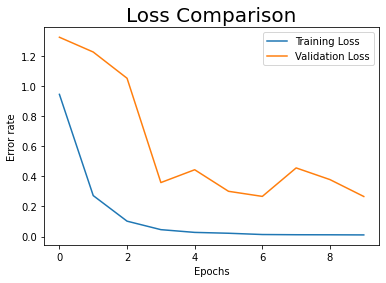

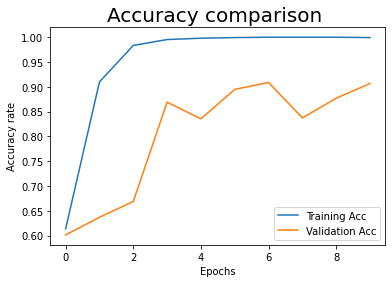

In [15]:
Inception.summary()

y_pred4=Inception.predict(x_test)

y_pred4=np.argmax(y_pred4,axis=1)

print("-"*80)
print("Accuracy Found: ",accuracy_score(y_test,y_pred4))

print("-"*80)
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred4)) 
print("-"*80)
print("Classification Report:\n",classification_report(y_test,y_pred4))
print("-"*80)

#plt.figure(figsize=(15,9))
plt.title('Loss Comparison',fontsize=20)
plt.plot(history2.history['loss'],)
plt.plot(history2.history['val_loss'])
plt.legend(['Training Loss','Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Error rate")
plt.show()


#plt.figure(figsize=(15,9))
plt.title('Accuracy comparison ',fontsize=20)
plt.plot(history2.history['accuracy'],)
plt.plot(history2.history['val_accuracy'])
plt.legend(['Training Acc','Validation Acc'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy rate")
plt.show()

# Model_5. DenseNet201

In [46]:
DenseNet201=tf.keras.applications.DenseNet201(weights='imagenet',include_top=False, input_shape=x_train.shape[1:])

flat1=Flatten()(DenseNet201.layers[-1].output)
class1=Dense(512,activation='relu')(flat1)
output=Dense(11,activation='softmax')(class1)

DenseNet201=Model(inputs=DenseNet201.inputs,outputs=output)


for layer in DenseNet201.layers[:20]:
    layer.trainable = False
for layer in DenseNet201.layers[20:]:
    layer.trainable = True
    
DenseNet201.compile(optimizer='Adagrad',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

history2=DenseNet201.fit(x_train,
                     y_train,
                     verbose=1,
                     epochs=10,  #20
                     batch_size=32,  #15
                     validation_data=(x_test,y_test) )

Epoch 1/10
48/48 [==============================] - 1142s 23s/step - loss: 0.9162 - accuracy: 0.7130 - val_loss: 0.6820 - val_accuracy: 0.7044
Epoch 2/10
48/48 [==============================] - 1045s 22s/step - loss: 0.0911 - accuracy: 0.9828 - val_loss: 0.3434 - val_accuracy: 0.8730
Epoch 3/10
48/48 [==============================] - 1047s 22s/step - loss: 0.0275 - accuracy: 0.9993 - val_loss: 0.2879 - val_accuracy: 0.8948
Epoch 4/10
48/48 [==============================] - 1052s 22s/step - loss: 0.0143 - accuracy: 0.9993 - val_loss: 0.2287 - val_accuracy: 0.9147
Epoch 5/10


In [ ]:
#DenseNet201.summary()

y_pred5=DenseNet201.predict(x_test)

y_pred5=np.argmax(y_pred5,axis=1)

print("-"*80)
print("Accuracy Found: ",accuracy_score(y_test,y_pred5))

print("-"*80)
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred5)) 
print("-"*80)
print("Classification Report:\n",classification_report(y_test,y_pred5))
print("-"*80)

#plt.figure(figsize=(15,9))
plt.title('Loss Comparison',fontsize=20)
plt.plot(history2.history['loss'],)
plt.plot(history2.history['val_loss'])
plt.legend(['Training Loss','Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Error rate")
plt.show()


#plt.figure(figsize=(15,9))
plt.title('Accuracy comparison ',fontsize=20)
plt.plot(history2.history['accuracy'],)
plt.plot(history2.history['val_accuracy'])
plt.legend(['Training Acc','Validation Acc'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy rate")
plt.show()

# Model_6. MobileNetV2

In [26]:
Mobile_netv2 =tf.keras.applications.MobileNetV2(weights='imagenet',include_top=False, input_shape=x_train.shape[1:])

flat1=Flatten()(Mobile_netv2.layers[-1].output)
class1=Dense(512,activation='relu')(flat1)
output=Dense(11,activation='softmax')(class1)

Mobile_netv2=Model(inputs=Mobile_netv2.inputs,outputs=output)


for layer in Mobile_netv2.layers[:20]:
    layer.trainable = False
for layer in Mobile_netv2.layers[20:]:
    layer.trainable = True
    
Mobile_netv2.compile(optimizer='Adagrad',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

history6=Mobile_netv2.fit(x_train,
                     y_train,
                     verbose=1,
                     epochs=10,  #20
                     batch_size=32,  #15
                     validation_data=(x_test,y_test) )

Epoch 1/10
48/48 [==============================] - 140s 3s/step - loss: 1.0184 - accuracy: 0.6832 - val_loss: 0.8918 - val_accuracy: 0.6667
Epoch 2/10
48/48 [==============================] - 133s 3s/step - loss: 0.1070 - accuracy: 0.9729 - val_loss: 1.0913 - val_accuracy: 0.6627
Epoch 3/10
48/48 [==============================] - 131s 3s/step - loss: 0.0388 - accuracy: 0.9940 - val_loss: 0.5412 - val_accuracy: 0.7956
Epoch 4/10
48/48 [==============================] - 129s 3s/step - loss: 0.0236 - accuracy: 0.9974 - val_loss: 1.4072 - val_accuracy: 0.6190
Epoch 5/10
48/48 [==============================] - 128s 3s/step - loss: 0.0192 - accuracy: 0.9974 - val_loss: 0.7223 - val_accuracy: 0.7857
Epoch 6/10
48/48 [==============================] - 127s 3s/step - loss: 0.0121 - accuracy: 0.9993 - val_loss: 0.5774 - val_accuracy: 0.7956
Epoch 7/10
48/48 [==============================] - 127s 3s/step - loss: 0.0077 - accuracy: 0.9993 - val_loss: 0.5327 - val_accuracy: 0.7956
Epoch 8/10
48

--------------------------------------------------------------------------------
Accuracy Found:  0.7936507936507936
--------------------------------------------------------------------------------
Confusion Matrix:
 [[110   2   1   7]
 [  0 209   1   0]
 [ 33   0  18  18]
 [ 42   0   0  63]]
--------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.92      0.72       120
           1       0.99      1.00      0.99       210
           2       0.90      0.26      0.40        69
           3       0.72      0.60      0.65       105

    accuracy                           0.79       504
   macro avg       0.80      0.69      0.69       504
weighted avg       0.83      0.79      0.78       504

--------------------------------------------------------------------------------


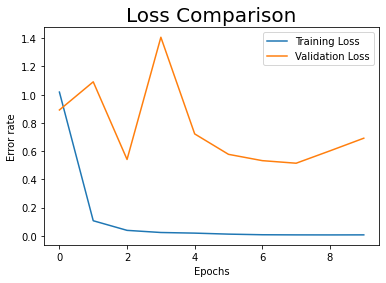

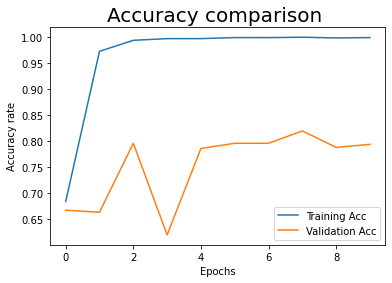

In [27]:
#mn = Mobile_netv2.summary()
#mn.head()

y_pred6=Mobile_netv2.predict(x_test)

y_pred6=np.argmax(y_pred6,axis=1)

print("-"*80)
print("Accuracy Found: ",accuracy_score(y_test,y_pred6))

print("-"*80)
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred6)) 
print("-"*80)
print("Classification Report:\n",classification_report(y_test,y_pred6))
print("-"*80)

#plt.figure(figsize=(15,9))
plt.title('Loss Comparison',fontsize=20)
plt.plot(history6.history['loss'],)
plt.plot(history6.history['val_loss'])
plt.legend(['Training Loss','Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Error rate")
plt.show()


#plt.figure(figsize=(15,9))
plt.title('Accuracy comparison ',fontsize=20)
plt.plot(history6.history['accuracy'],)
plt.plot(history6.history['val_accuracy'])
plt.legend(['Training Acc','Validation Acc'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy rate")
plt.show()


# Model_7. VGG16

In [30]:
vgg =tf.keras.applications.VGG16(weights='imagenet',include_top=False, input_shape=x_train.shape[1:])


flat1=Flatten()(vgg.layers[-1].output)
class1=Dense(512,activation='relu')(flat1)
output=Dense(11,activation='softmax')(class1)

vgg=Model(inputs=vgg.inputs,outputs=output)


for layer in vgg.layers[:20]:
    layer.trainable = False
for layer in vgg.layers[20:]:
    layer.trainable = True
    
vgg.compile(optimizer='Adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

history7=vgg.fit(x_train,
                     y_train,
                     verbose=1,
                     epochs=10,  #20
                     batch_size=32,  #15
                     validation_data=(x_test,y_test) )

Epoch 1/10
48/48 [==============================] - 172s 4s/step - loss: 1.7459 - accuracy: 0.6574 - val_loss: 1.1325 - val_accuracy: 0.7103
Epoch 2/10
48/48 [==============================] - 167s 3s/step - loss: 0.3082 - accuracy: 0.8843 - val_loss: 0.6857 - val_accuracy: 0.7937
Epoch 3/10
48/48 [==============================] - 167s 3s/step - loss: 0.0806 - accuracy: 0.9709 - val_loss: 0.7071 - val_accuracy: 0.7937
Epoch 4/10
48/48 [==============================] - 164s 3s/step - loss: 0.0352 - accuracy: 0.9914 - val_loss: 0.6492 - val_accuracy: 0.8095
Epoch 5/10
48/48 [==============================] - 165s 3s/step - loss: 0.0154 - accuracy: 0.9993 - val_loss: 0.5673 - val_accuracy: 0.8333
Epoch 6/10
48/48 [==============================] - 165s 3s/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.5552 - val_accuracy: 0.8353
Epoch 7/10
48/48 [==============================] - 165s 3s/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.5732 - val_accuracy: 0.8353
Epoch 8/10
48

--------------------------------------------------------------------------------
Accuracy Found:  0.7936507936507936
--------------------------------------------------------------------------------
Confusion Matrix:
 [[110   2   1   7]
 [  0 209   1   0]
 [ 33   0  18  18]
 [ 42   0   0  63]]
--------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.92      0.72       120
           1       0.99      1.00      0.99       210
           2       0.90      0.26      0.40        69
           3       0.72      0.60      0.65       105

    accuracy                           0.79       504
   macro avg       0.80      0.69      0.69       504
weighted avg       0.83      0.79      0.78       504

--------------------------------------------------------------------------------


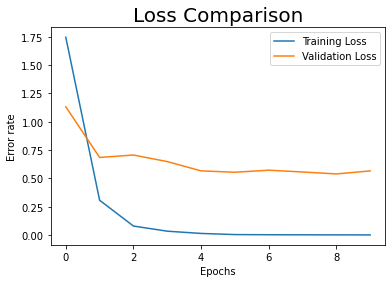

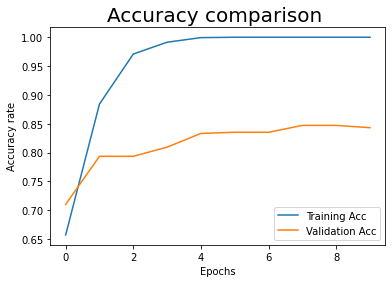

In [31]:
#mn = vgg.summary()
#mn.head()

y_pred7=Mobile_netv2.predict(x_test)

y_pred7=np.argmax(y_pred7,axis=1)

print("-"*80)
print("Accuracy Found: ",accuracy_score(y_test,y_pred7))

print("-"*80)
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred7)) 
print("-"*80)
print("Classification Report:\n",classification_report(y_test,y_pred7))
print("-"*80)

#plt.figure(figsize=(15,9))
plt.title('Loss Comparison',fontsize=20)
plt.plot(history7.history['loss'],)
plt.plot(history7.history['val_loss'])
plt.legend(['Training Loss','Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Error rate")
plt.show()


#plt.figure(figsize=(15,9))
plt.title('Accuracy comparison ',fontsize=20)
plt.plot(history7.history['accuracy'],)
plt.plot(history7.history['val_accuracy'])
plt.legend(['Training Acc','Validation Acc'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy rate")
plt.show()


# K_fold Cross Validation

In [18]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

CnnCv=Sequential()
CnnCv.add(Conv2D(64, kernel_size=(3, 3), input_shape=x_train.shape[1:], activation='relu'))
CnnCv.add(MaxPooling2D(3,3))
CnnCv.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
CnnCv.add(MaxPooling2D(3,3))
CnnCv.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
CnnCv.add(MaxPooling2D(3,3))

CnnCv.add(Flatten())

CnnCv.add(Dense(256,activation='relu'))
CnnCv.add(Dropout(0.2))

CnnCv.add(Dense(9,activation='softmax'))

CnnCv.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

CnnCv.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 256)        0

In [35]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
pat = 5
early_stopping = EarlyStopping(monitor='val_loss',patience = pat,verbose = 1)
model_checkpoint = ModelCheckpoint('CV.h5',verbose =1,save_best_only=True)

def fit_and_evaluate(x_train,x_test,y_train,y_test):
    model = None
    model = CnnCv
    results = model.fit(x_train,y_train,epochs=20,batch_size = 128, callbacks = [early_stopping,model_checkpoint],verbose=1,validation_split=0.1)
    print("Val score : ",model.evaluate(x_test,y_test))
    return results

In [36]:
n_folds = 5
#epochs = 20
#batch_size = 128
model_history = []

for i in range(n_folds):
    print("Training on fold : ",i+1)



    
    #t_x,val_x,t_y,val_y = train_test_split(x,y,test_size = 0.1,random_state = np.random.randint(1,1000,1)[0])
    model_history.append(fit_and_evaluate(x_train,x_test,y_train,y_test))

Training on fold :  1
Epoch 1/20
11/11 [==============================] - ETA: 0s - loss: 1.5287 - accuracy: 0.3382
Epoch 1: val_loss improved from inf to 1.20783, saving model to CV.h5
11/11 [==============================] - 107s 8s/step - loss: 1.5287 - accuracy: 0.3382 - val_loss: 1.2078 - val_accuracy: 0.5789
Epoch 2/20
11/11 [==============================] - ETA: 0s - loss: 1.0228 - accuracy: 0.5588
Epoch 2: val_loss improved from 1.20783 to 0.90594, saving model to CV.h5
11/11 [==============================] - 91s 8s/step - loss: 1.0228 - accuracy: 0.5588 - val_loss: 0.9059 - val_accuracy: 0.5789
Epoch 3/20
11/11 [==============================] - ETA: 0s - loss: 0.8623 - accuracy: 0.5713
Epoch 3: val_loss improved from 0.90594 to 0.79400, saving model to CV.h5
11/11 [==============================] - 91s 8s/step - loss: 0.8623 - accuracy: 0.5713 - val_loss: 0.7940 - val_accuracy: 0.6118
Epoch 4/20
11/11 [==============================] - ETA: 0s - loss: 0.7916 - accuracy: 0.6

In [12]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
kfold = StratifiedKFold(n_splits = 7,shuffle = True, random_state=42)
j = 0
for train_idx, val_idx in list(kfold.split(x_train,x_test)):
    x_train_df = df.iloc[train_idx]
    x_test_df = df.iloc[val_idx]

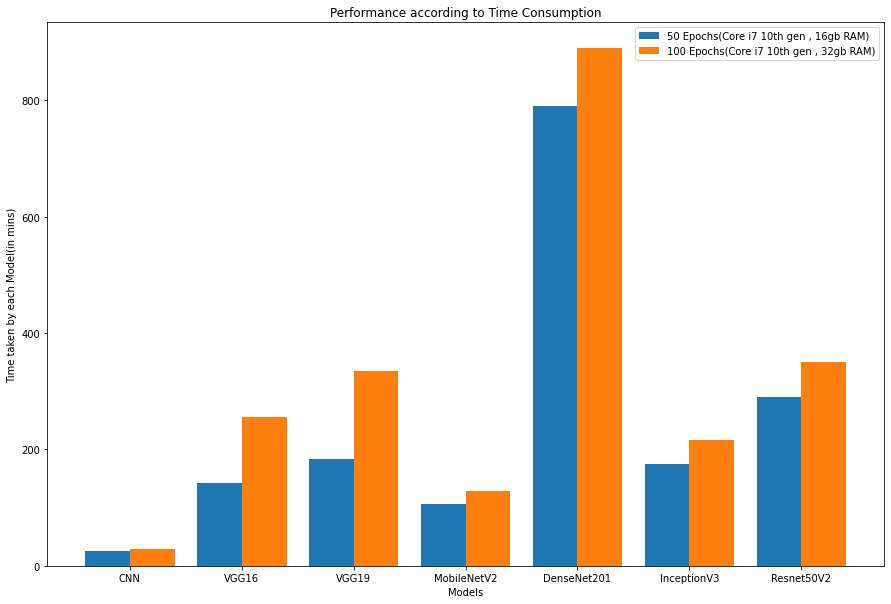

In [21]:
import matplotlib.pyplot as plt
import numpy as np

x = ['CNN','VGG16','VGG19','MobileNetV2','DenseNet201','InceptionV3','Resnet50V2']
Fifty_Epochs = [25,142,183,107,790,175,290] 
Hundred_Epochs = [29,256,335,128,890,216,351]

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2,Fifty_Epochs,0.4,label = '50 Epochs(Core i7 10th gen , 16gb RAM)')
plt.bar(x_axis + 0.2,Hundred_Epochs,0.4,label = '100 Epochs(Core i7 10th gen , 32gb RAM)')


plt.xticks(x_axis,x)
plt.xlabel('Models')
plt.ylabel('Time taken by each Model(in mins)')
plt.title('Performance according to Time Consumption')
#plt.figure(figsize=(15,9))
plt.legend()
plt.show()
#plt.grid()
plt.rcParams["figure.figsize"] = (15,10)


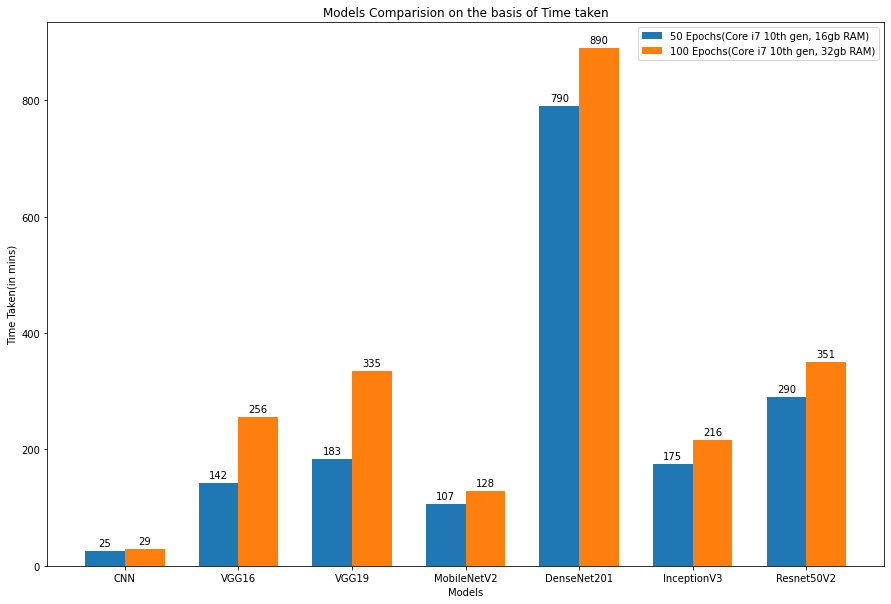

In [28]:
import matplotlib.pyplot as plt
import numpy as np


models =  ['CNN','VGG16','VGG19','MobileNetV2','DenseNet201','InceptionV3','Resnet50V2']
fifty=[25,142,183,107,790,175,290] 
Hundred =[29,256,335,128,890,216,351]


x = np.arange(len(models))  
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, fifty, width, label='50 Epochs(Core i7 10th gen, 16gb RAM)')
rects2 = ax.bar(x + width/2, Hundred, width, label='100 Epochs(Core i7 10th gen, 32gb RAM)')


ax.set_ylabel('Time Taken(in mins)')
ax.set_xlabel('Models')
ax.set_title('Models Comparision on the basis of Time taken')
ax.set_xticks(x, models)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
plt.rcParams["figure.figsize"] = (15,10)
#fig.tight_layout()

plt.show()

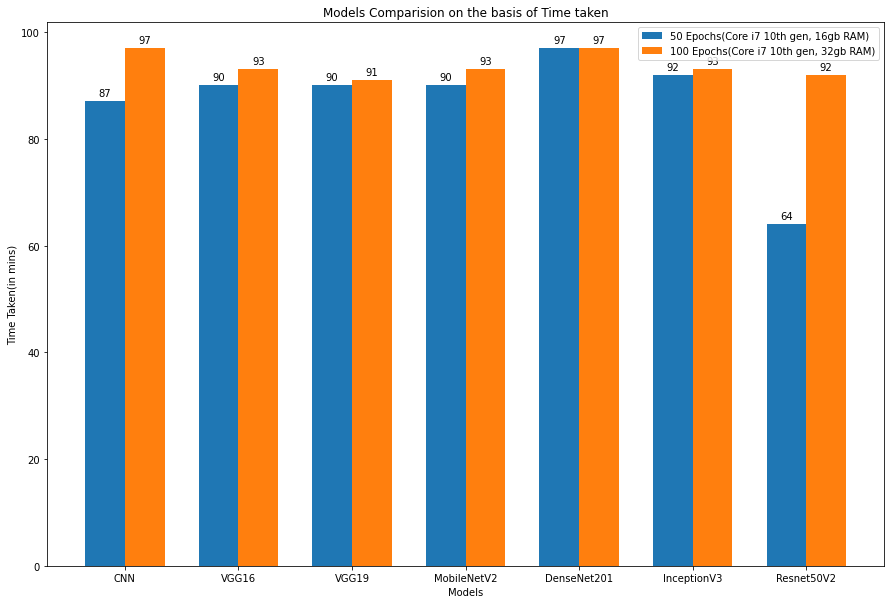

In [38]:
import matplotlib.pyplot as plt
import numpy as np


models =  ['CNN','VGG16','VGG19','MobileNetV2','DenseNet201','InceptionV3','Resnet50V2']
fifty=[87,90,90,90,97,92,64] 
Hundred =[97,93,91,93,97,93,92]


x = np.arange(len(models))  
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, fifty, width, label='50 Epochs(Core i7 10th gen, 16gb RAM)')
rects2 = ax.bar(x + width/2, Hundred, width, label='100 Epochs(Core i7 10th gen, 32gb RAM)')


ax.set_ylabel('Time Taken(in mins)')
ax.set_xlabel('Models')
ax.set_title('Models Comparision on the basis of Time taken')
ax.set_xticks(x, models)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
plt.rcParams["figure.figsize"] = (15,10)
#fig.tight_layout()

plt.show()

In [46]:
import plotly.graph_objects as go

models =  ['CNN','VGG16','VGG19','MobileNetV2','DenseNet201','InceptionV3','Resnet50V2']
fifty=[87,90,90,90,97,92,64] 
Hundred =[97,93,91,93,97,93,92]

fig=go.Figure()

fig.add_trace(go.Scatter(x=models,y=fifty,name = '50 Epochs(Core i7 10th gen, 16gb RAM)'))
fig.add_trace(go.Scatter(x=models,y=Hundred,name = '100 Epochs(Core i7 10th gen, 32gb RAM)'))

fig.update_layout(title='Accuracy of the models with different Epocs and Configuration',
                    xaxis_title='Models',
                    yaxis_title='Accuracy',width=1000,height = 400)
fig.show()